In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data_folder = "./data/flower_data/train/1/"

In [3]:
filename = "image_06737.jpg"

In [4]:
image = cv2.imread(data_folder+filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

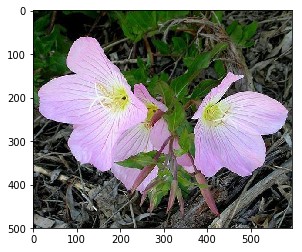

In [5]:
plt.imshow(image)
plt.show()

In [6]:
rows,cols,ch = image.shape
print(rows, cols, ch)

500 595 3


In [7]:
delta = 0.1

In [8]:
# top-left, top right generate
tl = [(0, 0), (int(rows*delta), 0), (0, int(cols*delta)), (int(rows*delta), int(cols*delta))]
tr = [(cols, 0), (int(cols*(1-delta)), 0), (cols, int(rows*delta)), (int(cols*(1-delta)), int(rows*delta))]

# bottom-left, bottom-right generate
bl = [(0, rows), (0, int(rows*(1-delta))), (int(cols*delta), rows), (int(cols*delta), int(rows*(1-delta)))]
br = [(cols, rows), (int(cols*(1-delta)), rows), (cols, int(rows*(1-delta))), (int(cols*(1-delta)), int(rows*(1-delta)))]

In [9]:
tl

[(0, 0), (50, 0), (0, 59), (50, 59)]

In [10]:
tr

[(595, 0), (535, 0), (595, 50), (535, 50)]

In [11]:
bl

[(0, 500), (0, 450), (59, 500), (59, 450)]

In [12]:
br

[(595, 500), (535, 500), (595, 450), (535, 450)]

In [13]:
result = [(x,y,z,t) for x in tl for y in tr for z in bl for t in br]

In [14]:
result[:5]

[((0, 0), (595, 0), (0, 500), (595, 500)),
 ((0, 0), (595, 0), (0, 500), (535, 500)),
 ((0, 0), (595, 0), (0, 500), (595, 450)),
 ((0, 0), (595, 0), (0, 500), (535, 450)),
 ((0, 0), (595, 0), (0, 450), (595, 500))]

In [15]:
len(result)

256

In [16]:
result[0]

((0, 0), (595, 0), (0, 500), (595, 500))

In [17]:
result[0]

((0, 0), (595, 0), (0, 500), (595, 500))

In [90]:
pts1 = np.float32([[0,0],[595,0],[0,500],[595,500]]) # 1-top left, 2-top right, 3-bottom left, 4-bottom right
# pts1 = np.float32([[0,0],[595,0],[0,500],[595,500]]) # 1-top left, 2-top right, 3-bottom left, 4-bottom right

# pts1 = np.float32(result[0])
pts2 = np.float32([[595,0],[0,0],[500,595],[0,500]])

In [91]:
M = cv2.getPerspectiveTransform(pts1,pts2)

In [92]:
dst = cv2.warpPerspective(image,M,(595,500), flags=cv2.INTER_LINEAR) # width, height
# warped = cv2.warpPerspective(image, M, (h, w), flags=cv2.INTER_LINEAR)

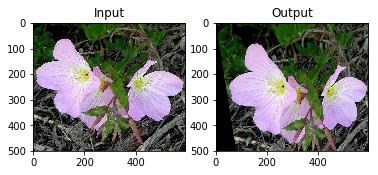

In [93]:
plt.subplot(121),plt.imshow(image),plt.title('Input')
plt.subplot(122),plt.imshow(cv2.flip(dst,1)),plt.title('Output')
plt.show()

In [64]:
x = [pts1[0][0], pts1[2][0], pts1[3][0], pts1[1][0], pts1[0][0]]
y = [pts1[0][1], pts1[2][1], pts1[3][1], pts1[1][1], pts1[0][1]]

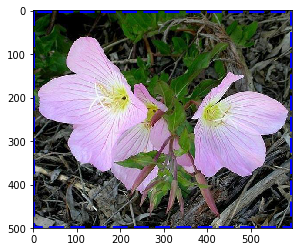

In [65]:
plt.plot(x, y, 'b--', lw=4)
plt.imshow(image, cmap='Greys_r')
plt.show()

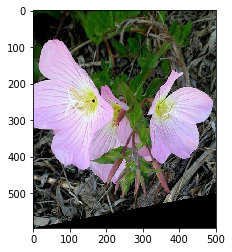

In [66]:
plt.imshow(cv2.flip(dst,1))
plt.show()

### Test

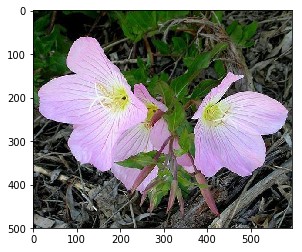

In [67]:
plt.imshow(image)
plt.show()

In [68]:
h, w = image.shape[:2]

In [69]:
h,w

(500, 595)

In [70]:
result[0]

((0, 0), (595, 0), (0, 500), (595, 500))

In [78]:
w, h = image.shape[0], image.shape[1]
# We will first manually select the source points 
# we will select the destination point which will map the source points in
# original image to destination points in unwarped image
# src = np.float32([(20,     1),
#                   (540,  130),
#                   (20,    500),
#                   (570,  450)])

# dst = np.float32([(600, 0),
#                   (0, 0),
#                   (595, 531),
#                   (0, 531)])


src = np.float32([(0, 0),
                  (595, 0),
                  (0, 500),
                  (595, 500)])
# src = np.float32([(100, 100),
#                   (495, 100),
#                   (0, 500),
#                   (595, 500)])

dst = np.float32([(595, 0),
                  (0, 0),
                  (595, 500),
                  (0, 500)])



In [79]:
w, h

(500, 595)

In [80]:
x = [src[0][0], src[2][0], src[3][0], src[1][0], src[0][0]]
y = [src[0][1], src[2][1], src[3][1], src[1][1], src[0][1]]

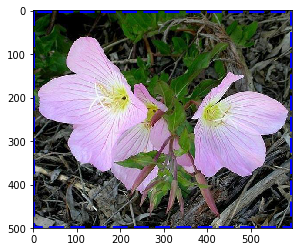

In [81]:
plt.plot(x, y, 'b--', lw=4)
plt.imshow(image, cmap='Greys_r')
plt.show()

In [82]:
# use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
M = cv2.getPerspectiveTransform(src, dst)

# use cv2.warpPerspective() to warp your image to a top-down view
# warped = cv2.warpPerspective(image, M, (w, h), flags=cv2.INTER_LINEAR)
warped = cv2.warpPerspective(image, M, (h, w), flags=cv2.INTER_LINEAR)

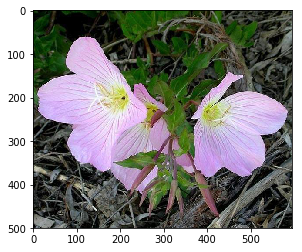

In [83]:
plt.imshow(cv2.flip(warped,1))
plt.show()

In [77]:
warped.shape

(500, 595, 3)